In [1]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
import pickle

from MassMatrix.wrapper_module_0 import autofunc_c as MassMatrix
from CoriolisVector.wrapper_module_1 import autofunc_c as CoriolisVector
from Ls.wrapper_module_2 import autofunc_c as Ls
from Lm.wrapper_module_3 import autofunc_c as Lm
from Ls_derivative.wrapper_module_4 import autofunc_c as Ls_d
from Lm_derivative.wrapper_module_5 import autofunc_c as Lm_d

from pympc.geometry.polyhedron import Polyhedron
from pympc.dynamics.discrete_time_systems import LinearSystem
from pympc.control.controllers import ModelPredictiveController
from pympc.plot import plot_input_sequence, plot_state_trajectory, plot_state_space_trajectory


In [2]:
def mass_matrix(spacecraft_angles=None, joint_angles=None, Is=None, I_link=None, mass=None):
    if not Is:
        Is = np.array([1400, 1400, 2040])
    if not I_link:
        I_link = np.array([0.10, 0.25, 0.25, 0.10, 0.26, 0.26, 0.10, 0.26, 0.26])  # Ixx1, Ixx2, Ixx3, Iyy1, Iyy2, Iyy3, Izz1, Izz2, Izz3
    if not mass:
        mass = np.array([200.0, 20.0, 50.0, 50.0]) # m0=mass of satellite and the rest are link masses
    Is_xx, Is_yy, Is_zz = Is
    Ixx1, Ixx2, Ixx3, Iyy1, Iyy2, Iyy3, Izz1, Izz2, Izz3 = I_link
    alpha, beta, gamma = spacecraft_angles
    m0, m1, m2, m3 = mass
    theta_1, theta_2, theta_3 = joint_angles
    return MassMatrix(Is_xx, Is_yy, Is_zz, Ixx1, Ixx2, Ixx3, Iyy1, Iyy2, Iyy3, Izz1, Izz2, Izz3, alpha, beta, gamma, m0, m1, m2, m3, theta_1, theta_2, theta_3)

In [3]:
def coriolis_vector(spacecraft_angles=None, joint_angles=None, spacecraft_vel=None, joint_vel=None, Is=None, I_link=None, mass=None):
    if not Is:
        Is = np.array([1400, 1400, 2040])
    if not I_link:
        I_link = np.array([0.10, 0.25, 0.25, 0.10, 0.26, 0.26, 0.10, 0.26, 0.26])  # Ixx1, Ixx2, Ixx3, Iyy1, Iyy2, Iyy3, Izz1, Izz2, Izz3
    if not mass:
        mass = np.array([200.0, 20.0, 50.0, 50.0]) # m0=mass of satellite and the rest are link masses
    Is_xx, Is_yy, Is_zz = Is
    Ixx1, Ixx2, Ixx3, Iyy1, Iyy2, Iyy3, Izz1, Izz2, Izz3 = I_link
    alpha, beta, gamma = spacecraft_angles
    m0, m1, m2, m3 = mass
    theta_1, theta_2, theta_3 = joint_angles
    alpha_d, beta_d, gamma_d = spacecraft_vel
    theta_1d, theta_2d, theta_3d = joint_vel
    return CoriolisVector(Is_xx, Is_yy, Is_zz, Ixx1, Ixx2, Ixx3, Iyy1, Iyy2, Iyy3, Izz1, Izz2, Izz3, alpha, alpha_d, beta, beta_d, gamma, gamma_d, m0, m1, m2, m3, theta_1, theta_1d, theta_2, theta_2d, theta_3, theta_3d)

In [4]:
def calculate_Ls(spacecraft_angles=None, joint_angles=None, Is=None, I_link=None, mass=None):
    if not Is:
        Is = np.array([1400, 1400, 2040])
    if not I_link:
        I_link = np.array([0.10, 0.25, 0.25, 0.10, 0.26, 0.26, 0.10, 0.26, 0.26])  # Ixx1, Ixx2, Ixx3, Iyy1, Iyy2, Iyy3, Izz1, Izz2, Izz3
    if not mass:
        mass = np.array([200.0, 20.0, 50.0, 50.0]) # m0=mass of satellite and the rest are link masses
    Is_xx, Is_yy, Is_zz = Is
    Ixx1, Ixx2, Ixx3, Iyy1, Iyy2, Iyy3, Izz1, Izz2, Izz3 = I_link
    alpha, beta, gamma = spacecraft_angles
    m0, m1, m2, m3 = mass
    theta_1, theta_2, theta_3 = joint_angles
    return Ls(Is_xx, Is_yy, Is_zz, Ixx1, Ixx2, Ixx3, Iyy1, Iyy2, Iyy3, Izz1, Izz2, Izz3, alpha, beta, gamma, m0, m1, m2, m3, theta_1, theta_2, theta_3)

In [5]:
def calculate_Lm(spacecraft_angles=None, joint_angles=None, Is=None, I_link=None, mass=None):
    if not Is:
        Is = np.array([1400, 1400, 2040])
    if not I_link:
        I_link = np.array([0.10, 0.25, 0.25, 0.10, 0.26, 0.26, 0.10, 0.26, 0.26])  # Ixx1, Ixx2, Ixx3, Iyy1, Iyy2, Iyy3, Izz1, Izz2, Izz3
    if not mass:
        mass = np.array([200.0, 20.0, 50.0, 50.0]) # m0=mass of satellite and the rest are link masses
    Is_xx, Is_yy, Is_zz = Is
    Ixx1, Ixx2, Ixx3, Iyy1, Iyy2, Iyy3, Izz1, Izz2, Izz3 = I_link
    alpha, beta, gamma = spacecraft_angles
    m0, m1, m2, m3 = mass
    theta_1, theta_2, theta_3 = joint_angles
    return Lm(Ixx1, Ixx2, Ixx3, Iyy1, Iyy2, Iyy3, Izz1, Izz2, Izz3, alpha, beta, gamma, m0, m1, m2, m3, theta_1, theta_2, theta_3)

In [6]:
def Ls_derivative(spacecraft_angles=None, joint_angles=None, spacecraft_vel=None, joint_vel=None, Is=None, I_link=None, mass=None):
    if not Is:
        Is = np.array([1400, 1400, 2040])
    if not I_link:
        I_link = np.array([0.10, 0.25, 0.25, 0.10, 0.26, 0.26, 0.10, 0.26, 0.26])  # Ixx1, Ixx2, Ixx3, Iyy1, Iyy2, Iyy3, Izz1, Izz2, Izz3
    if not mass:
        mass = np.array([200.0, 20.0, 50.0, 50.0]) # m0=mass of satellite and the rest are link masses
    Is_xx, Is_yy, Is_zz = Is
    Ixx1, Ixx2, Ixx3, Iyy1, Iyy2, Iyy3, Izz1, Izz2, Izz3 = I_link
    alpha, beta, gamma = spacecraft_angles
    m0, m1, m2, m3 = mass
    theta_1, theta_2, theta_3 = joint_angles
    alpha_d, beta_d, gamma_d = spacecraft_vel
    theta_1d, theta_2d, theta_3d = joint_vel
    return Ls_d(Is_xx, Is_yy, Is_zz, Ixx1, Ixx2, Ixx3, Iyy1, Iyy2, Iyy3, Izz1, Izz2, Izz3, alpha, alpha_d, beta, beta_d, gamma, gamma_d, m0, m1, m2, m3, theta_1, theta_1d, theta_2, theta_2d, theta_3, theta_3d)

In [7]:
def Lm_derivative(spacecraft_angles=None, joint_angles=None, spacecraft_vel=None, joint_vel=None, Is=None, I_link=None, mass=None):
#     if not Is:
#         Is = np.array([1400, 1400, 2040])
    if not I_link:
        I_link = np.array([0.10, 0.25, 0.25, 0.10, 0.26, 0.26, 0.10, 0.26, 0.26])  # Ixx1, Ixx2, Ixx3, Iyy1, Iyy2, Iyy3, Izz1, Izz2, Izz3
    if not mass:
        mass = np.array([200.0, 20.0, 50.0, 50.0]) # m0=mass of satellite and the rest are link masses
#     Is_xx, Is_yy, Is_zz = Is
    Ixx1, Ixx2, Ixx3, Iyy1, Iyy2, Iyy3, Izz1, Izz2, Izz3 = I_link
    alpha, beta, gamma = spacecraft_angles
    m0, m1, m2, m3 = mass
    theta_1, theta_2, theta_3 = joint_angles
    alpha_d, beta_d, gamma_d = spacecraft_vel
    theta_1d, theta_2d, theta_3d = joint_vel
    return Lm_d(Ixx1, Ixx2, Ixx3, Iyy1, Iyy2, Iyy3, Izz1, Izz2, Izz3, alpha, alpha_d, beta, beta_d, gamma, gamma_d, m0, m1, m2, m3, theta_1, theta_1d, theta_2, theta_2d, theta_3, theta_3d)

In [8]:
# Test Values and functions
phi_s = np.array([0.1, 0.2, 0.3])  # alpha, beta, gamma
q = np.array([0.01, 0.2, 0.15])  # theta_1, theta_2, theta_3
phi_s_dot = np.array([.1, .2, .3])
q_dot = np.array([.3, .4, .5])

# mass_matrix(phi_s, q)
# coriolis_vector(phi_s, q, phi_s_dot, q_dot)
# calculate_Ls(phi_s, q)
# calculate_Lm(phi_s, q)
# Ls_derivative(phi_s, q, phi_s_dot, q_dot)
# Lm_derivative(phi_s, q, phi_s_dot, q_dot)

In [74]:
n_states, n_inputs = 6, 3
identity = np.eye(int(n_states/2))
zeros = np.zeros((int(n_states/2), int(n_states/2)))
# Continuous time dynamics: 
A = np.vstack((np.hstack((zeros, identity)), np.hstack((zeros, zeros))))
B = np.vstack((zeros, identity))
h = .1
method = 'zero_order_hold'
S = LinearSystem.from_continuous(A, B, h, method)
N = 10  # prediction horizon
Q = 50 * np.eye(n_states)
R = 0.002 * np.eye(n_inputs)

In [75]:
P, K = S.solve_dare(Q, R)

In [76]:
u_min = -100 * np.ones(n_inputs)
u_max = 100 * np.ones(n_inputs)
U = Polyhedron.from_bounds(u_min, u_max)
x_min = -100 * np.ones(n_states)
x_max = 100 * np.ones(n_states)
X = Polyhedron.from_bounds(x_min, x_max)
D = X.cartesian_product(U)

In [77]:
X_N = S.mcais(K, D)

In [78]:
controller = ModelPredictiveController(S, N, Q, R, P, D, X_N)

In [79]:
# Nsim = 50
# x0 = np.array([0., 1.57, 0, 0., 0., 0.])
# u = []
# x = [x0]
# for t in range(Nsim):
#     u.append(controller.feedback(x[t]))
#     x.append(S.A.dot(x[t]) + S.B.dot(u[t]))

In [80]:
# plot_input_sequence(u, h, (u_min, u_max))
# plt.show()
# plot_state_trajectory(x, h, (x_min, x_max))
# plt.show()

In [81]:
with open('joint_angles.pickle', 'rb') as ja:
    joint_angles = pickle.loads(ja.read())

In [82]:
tt = 0.5
# eef_vel = np.vstack((tt*np.ones(eef_pos.shape[1]), tt*np.ones(eef_pos.shape[1]), np.zeros(eef_pos.shape[1])))
# x_ref = np.vstack((eef_pos, eef_vel))
x_ref = np.array(joint_angles, dtype=float)
x_ref = np.vstack((x_ref, np.zeros((x_ref.shape[0], x_ref.shape[1]))))

((6, 46), array([[0.        , 0.        ],
        [1.57079633, 1.57079633],
        [0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ]]))

In [83]:
Nsim = x_ref.shape[1]
x0 = np.array([0., 1.57, 0, 0., 0., 0.])
# x0 = np.array([0., 1.57, 0,])
u, x = [], [x0]
for t in range(Nsim):
    xx = x[t] - x_ref[:, t]
    u.append(controller.feedback(xx))
    x.append(S.A.dot(x[t]) + S.B.dot(u[t]))

In [84]:
# plot_input_sequence(u, h, (u_min, u_max))
# plt.show()
# plot_state_trajectory(x, h, (x_min, x_max))
# plt.show()
# len(x), len(u), x[0].shape
# x_ref[:, 3:8]

<IPython.core.display.Javascript object>


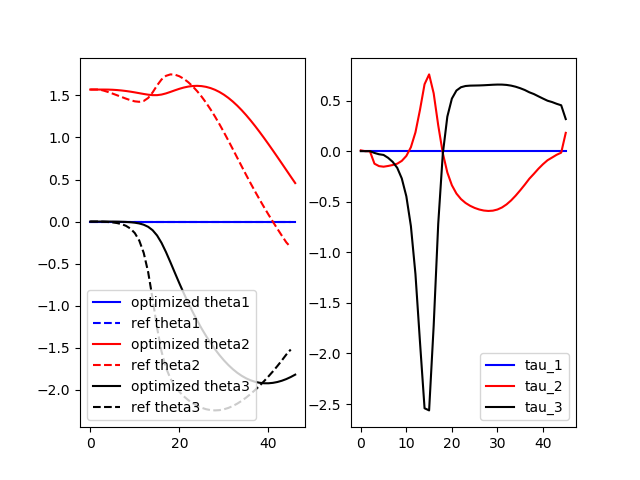

In [85]:
%matplotlib notebook
th_1, th_2, th_3 = np.zeros(len(x)), np.zeros(len(x)), np.zeros(len(x))
for i in range(len(x)):
    th_1[i], th_2[i], th_3[i] = x[i][0], x[i][1], x[i][2]
plt.subplot(1, 2, 1)
plt.plot(th_1, 'b', label='optimized theta1')
plt.plot(x_ref[0, :], 'b--', label='ref theta1')
plt.plot(th_2, 'r', label='optimized theta2')
plt.plot(x_ref[1, :], 'r--', label='ref theta2')
plt.plot(th_3, 'k', label='optimized theta3')
plt.plot(x_ref[2, :], 'k--', label='ref theta3')
plt.legend()
# plt.show()

u1, u2, u3 = np.zeros(len(u)), np.zeros(len(u)), np.zeros(len(u))
for i in range(len(u)):
    u1[i], u2[i], u3[i] = u[i][0], u[i][1], u[i][2]
plt.subplot(1, 2, 2)
plt.plot(u1, 'b', label='tau_1')
plt.plot(u2, 'r', label='tau_2')
plt.plot(u3, 'k', label='tau_3')
plt.legend()
plt.show()

In [93]:
####  ASH MPC Optimizer ####
from mpc_optimizer import mpc_opt
from utils import zero_order_hold
c = np.zeros(A.shape[0])
A_d, B_d, _ = zero_order_hold(A, B, c, h)
C = np.hstack((np.eye(3), np.zeros((3,3))))
Q1 = 50 * np.eye(3)
R1 = 0.0002 * np.eye(3)
P1 = Q1
              
mpc = mpc_opt(Q=Q1, P=P1, R=R1, A=A_d, B=B_d, C=C,  time=np.linspace(0, 10, Nsim), ul=u_min.reshape((len(u_min), 1)),
                       uh=u_max.reshape((len(u_max), 1)), xl=x_min.reshape((len(x_min), 1)),
              xh=x_max.reshape((len(x_max), 1)), N=N, ref_traj=C@x_ref)

In [94]:
x0 = x0.reshape((len(x0), 1))
u0 = np.array([[0.2], [0.3], [0.5]])
x0.shape, u0.shape
states, inputs = mpc.get_state_and_input(u0, x0)

i = : 0
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -0.00023242481732022036
            Iterations: 13
            Function evaluations: 16
            Gradient evaluations: 13
i = : 1
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -0.012324833124308654
            Iterations: 8
            Function evaluations: 9
            Gradient evaluations: 8
i = : 2
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -0.010112358001904909
            Iterations: 13
            Function evaluations: 16
            Gradient evaluations: 13
i = : 3
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -0.057979246271136375
            Iterations: 31
            Function evaluations: 35
            Gradient evaluations: 31
i = : 4
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -3.54953695899

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -148.99864115655345
            Iterations: 8
            Function evaluations: 9
            Gradient evaluations: 8
i = : 39
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -148.40176146053182
            Iterations: 22
            Function evaluations: 26
            Gradient evaluations: 22
i = : 40
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -146.59129615084203
            Iterations: 8
            Function evaluations: 9
            Gradient evaluations: 8
i = : 41
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -145.34799732879776
            Iterations: 18
            Function evaluations: 21
            Gradient evaluations: 18
i = : 42
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -140.58036653022936
           

<IPython.core.display.Javascript object>


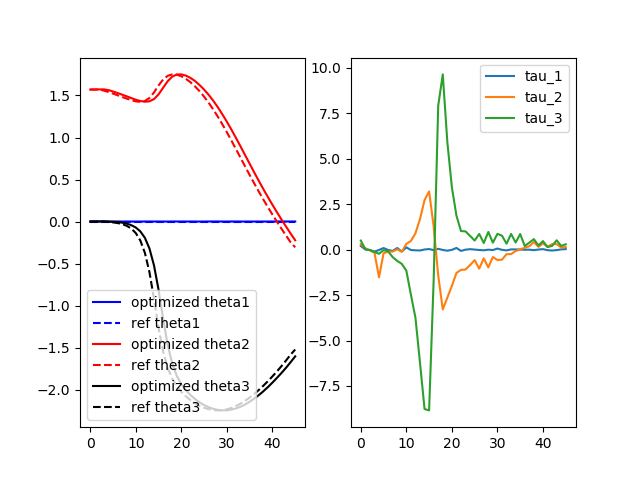

In [95]:
plt.figure()
plt.subplot(1, 2, 1)
plt.plot(states[0, :], 'b', label='optimized theta1')
plt.plot(x_ref[0, :], 'b--', label='ref theta1')

plt.plot(states[1, :], 'r', label='optimized theta2')
plt.plot(x_ref[1, :], 'r--', label='ref theta2')

plt.plot(states[2, :], 'k', label='optimized theta3')
plt.plot(x_ref[2, :], 'k--', label='ref theta3')
plt.legend()

plt.subplot(1, 2, 2)

plt.plot(inputs[0, :], label='tau_1')
plt.plot(inputs[1, :], label='tau_2')
plt.plot(inputs[2, :], label='tau_3')
plt.legend()

plt.show()